# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# move the columns to correct order
merged_df = merged_df[["Mouse ID",	"Timepoint", "Tumor Volume (mm3)",	"Metastatic Sites",	"Drug Regimen",	"Sex",	"Age_months",	"Weight (g)"]]

# Sort Timepoint from least to greatest and Mouse ID alphabetically
merged_df = merged_df.sort_values(["Timepoint", "Mouse ID"])

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.000000,0,Infubinol,Female,20,23
464,a251,0,45.000000,0,Infubinol,Female,21,25
474,a262,0,45.000000,0,Placebo,Female,17,29
484,a275,0,45.000000,0,Ceftamin,Female,20,28
494,a366,0,45.000000,0,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1855,y865,45,64.729837,3,Ceftamin,Male,23,26
84,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [6]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count


249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
# Explain Code:
# merged_df.duplicated(subset=["Mouse ID", "Timepoint"]) returns a boolean series
# merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])] returns the rows that are duplicated

duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :] 
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate_mice)==False]
# Make the Mouse ID Asend alphabetical
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.0,0,Infubinol,Female,20,23
464,a251,0,45.0,0,Infubinol,Female,21,25
474,a262,0,45.0,0,Placebo,Female,17,29
484,a275,0,45.0,0,Ceftamin,Female,20,28
494,a366,0,45.0,0,Stelasyn,Female,16,29


In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = clean_df.groupby("Drug Regimen")
mean = summary_df["Tumor Volume (mm3)"].mean()
median = summary_df["Tumor Volume (mm3)"].median()
variance = summary_df["Tumor Volume (mm3)"].var()
std_dev = summary_df["Tumor Volume (mm3)"].std()
sem = summary_df["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Mouse Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

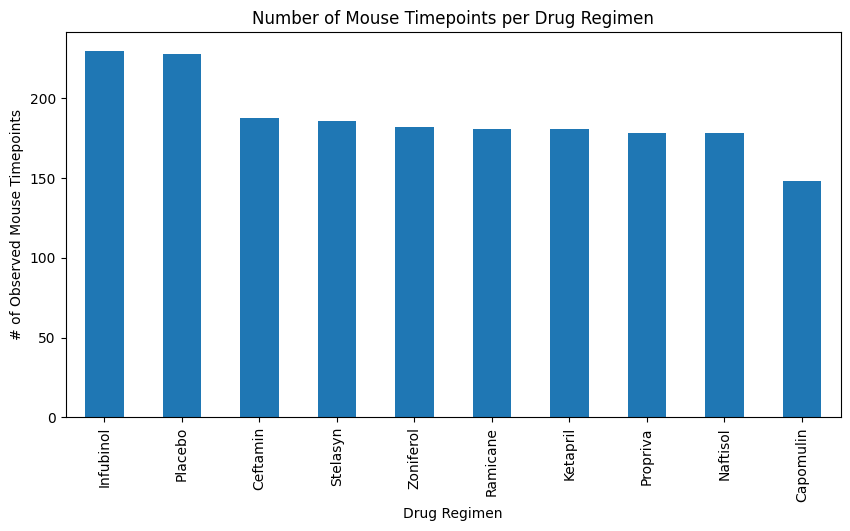

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df["Drug Regimen"].value_counts()
df = pd.DataFrame({"Drug Regimen": x_axis, "# of Observed Mouse Timepoints": y_axis})
# Change the x_label to "Drug Regimen"
df.plot(x="Drug Regimen", y="# of Observed Mouse Timepoints",xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints" ,rot=90, title="Number of Mouse Timepoints per Drug Regimen", legend=False, kind="bar", figsize=(10,5))


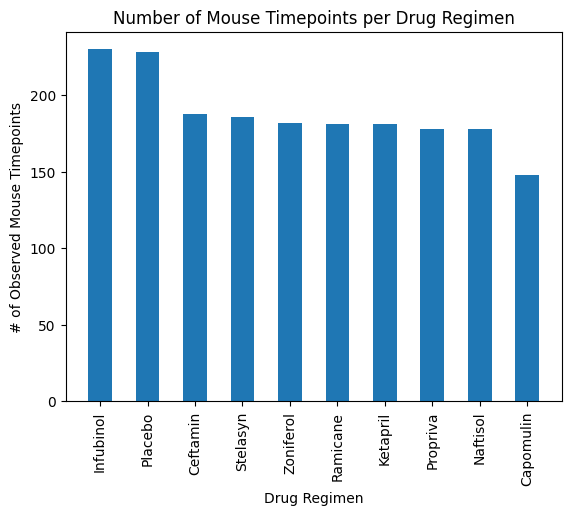

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

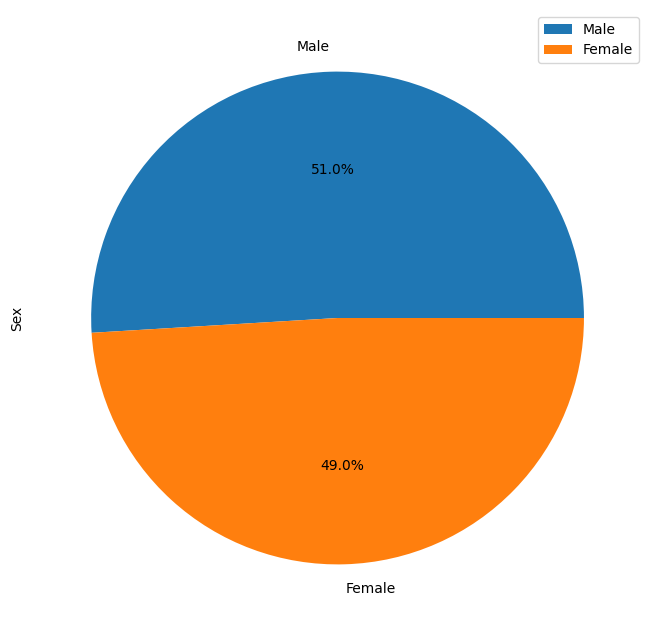

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()
# Put gender_counts into a DataFrame
gender_counts_df = pd.DataFrame(gender_counts, index=["Male", "Female"], columns=["Sex"])
#gender_counts_df
# Create a pie plot
gender_plot = gender_counts_df.plot(kind="pie", subplots=True, figsize=(8,8), autopct='%1.1f%%')
gender_plot
# Display the plot


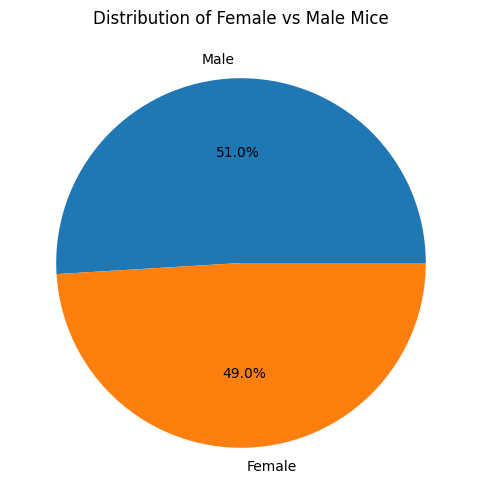

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_df['Sex'].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 6))  # Optional: adjust the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, greatest_timepoint, on=["Mouse ID", "Timepoint"], how="right")


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
    tumor_vol.append(0)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, treatment in enumerate(treatments):
    index_list = []
    for row in merged_df.iterrows():
        mouse_treatment = row[1]["Drug Regimen"]
        if treatment == mouse_treatment:
            # Save Tumor volume in the same index as treatment
            index_list.append(row[1]["Tumor Volume (mm3)"])
    tumor_vol[i] = index_list


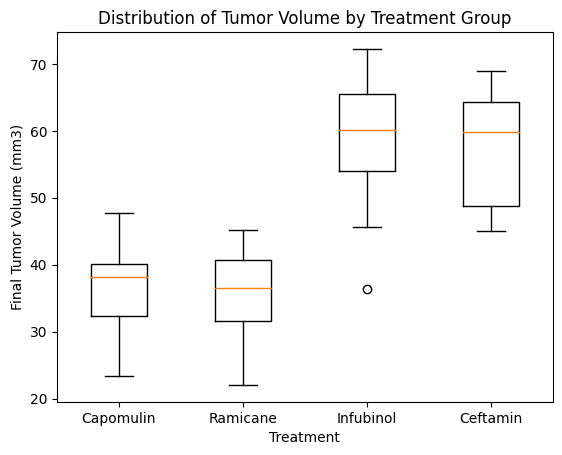

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)

# Add title and labels to boxplot
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)
plt.title('Distribution of Tumor Volume by Treatment Group')

# Display the plot
plt.show()


## Line and Scatter Plots

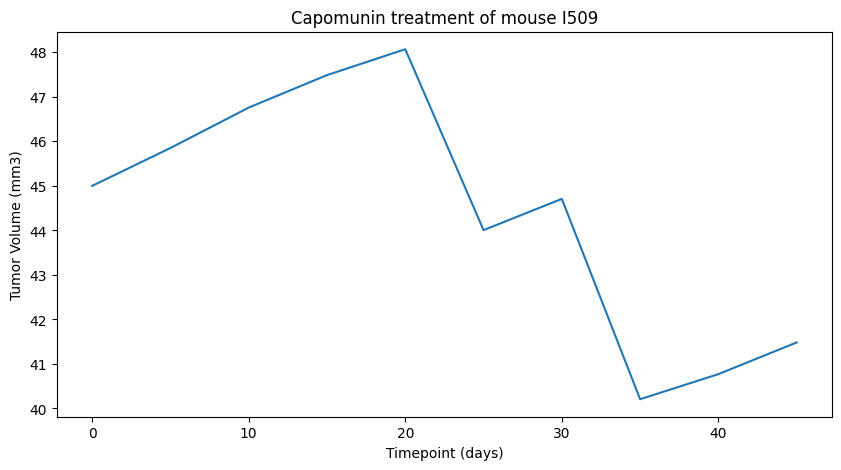

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with "Capomulin".
# Sort the DataFrame for only the rows that contain Capomulin and Mouse ID l509
plot_df = pd.DataFrame(clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509"), :])[[ "Timepoint", "Tumor Volume (mm3)"]]

plot_df.plot(x="Timepoint", y="Tumor Volume (mm3)", title="Capomunin treatment of mouse I509", legend=False, figsize=(10,5))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<Axes: title={'center': 'Average Tumor Volume vs. Mouse Weight'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

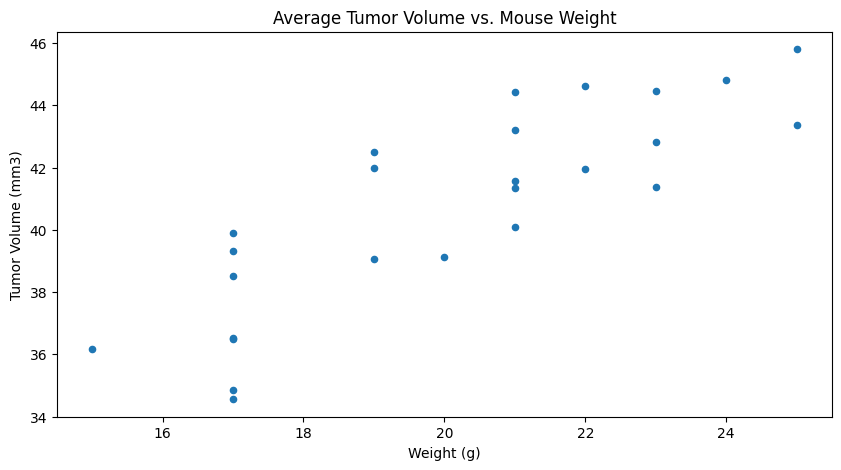

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plot_df = pd.DataFrame(clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), :])
average_tumor_vol = plot_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = plot_df.groupby("Mouse ID")["Weight (g)"].mean()

scatter_df = pd.merge(average_tumor_vol, mouse_weight, on="Mouse ID", how="outer")
scatter_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight", figsize=(10,5), )


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


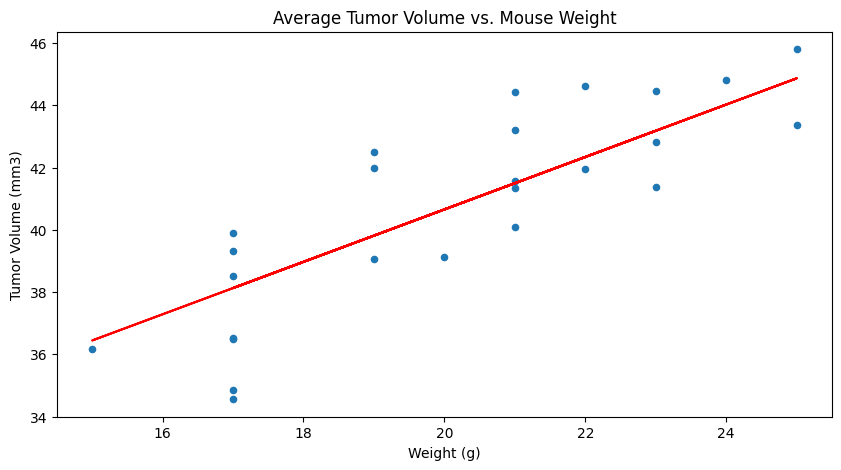

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
weight = scatter_df["Weight (g)"]
tumor_volume = scatter_df["Tumor Volume (mm3)"]
n = len(scatter_df)

product_sum = (weight * tumor_volume).sum()
sum_weight = weight.sum()
sum_tumor_volume = tumor_volume.sum()
sum_weight_squared = (weight**2).sum()
sum_tumor_volume_squared = (tumor_volume**2).sum()

correlation = (n * product_sum - sum_weight * sum_tumor_volume) / \
              ((n * sum_weight_squared - sum_weight ** 2) * (n * sum_tumor_volume_squared - sum_tumor_volume ** 2)) ** 0.5

sct = scatter_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight", figsize=(10,5))

sct.plot(weight, weight * correlation + tumor_volume.mean() - weight.mean() * correlation, color="red")
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
